In [59]:
import torch
from torch.utils.data import Dataset, random_split, Subset
import torchvision
from torchvision.transforms import ToTensor, ToPILImage, Resize, Compose
import matplotlib.pyplot as plt

In [88]:
img_transform = Compose([
    Resize(size=(300,300)),
    ToTensor()
])
data = torchvision.datasets.Caltech101(root='../data', download=True, transform=img_transform)

Files already downloaded and verified


In [89]:
import numpy as np
mask = np.ones(len(data), dtype=bool)
grayscale_count = 0
for i in range(len(data)):
    if data[i][0].shape[0] != 3:
        grayscale_count += 1
        mask[i] = False
print(grayscale_count)
data = Subset(data, np.where(mask)[0])

381


In [87]:
print(np.where(mask))

(array([   0,    1,    2, ..., 8672, 8674, 8676]),)


In [91]:
grayscale_count = 0
for i in range(len(data)):
    if data[i][0].shape[0] != 3:
        grayscale_count += 1
print(grayscale_count)

0


Text(0.5, 1.0, '0')

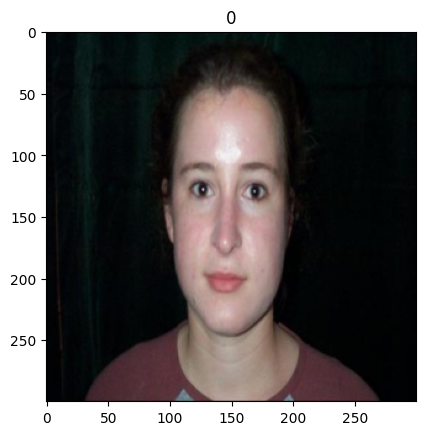

In [90]:
image, label = data[123]
convert_PIL = ToPILImage()
image = convert_PIL(image)
plt.imshow(image)
plt.title(label)

In [55]:
# fixed seed generator for reproducible data split
generator = torch.Generator().manual_seed(420) 
train_data, test_data, val_data = random_split(dataset, [0.8, 0.1, 0.1], generator=generator)
print(train_data)